# Python Geovisualization
#### Interactive Jupyter Notebook

This notebook provides an introduction to <b>Geovisualization</b> using Python. Both the <b>Matplotlib</b> family and <b>HTML-based</b> visualization are covered. This notebook was created by Becky Vandewalle based off of prior work by Dandong Yin.

## Notebook Outline:
- [Introduction](#intro)
- [Setup](#setup) (run this first!)
- [Matplotlib](#intro_matplotlib)
    - [Basic Plot Framework](#basic_plot)
    - [Plotting with Style](#plot_style)
    - [Plotting Shapes](#plot_shapes)
    - [Plotting with Numpy](#plot_numpy)
    - [More Plotting Control ](#plot_control)
- [Introducing Basemap](#intro_basemap)
    - [Basemap Backgrounds](#basemap_back)
    - [Projecting with Basemap](#basemap_prj)
    - [Plotting over Basemap](#basemap_plot)
- [GeoPandas, Brielfy](#geopandas)
    - [Combining GeoPandas and Basemap](#gpd_base)
- [Example: The Massachusetts Dataset](#mass_example)
- [Moving to the Web](#web_map)
    - [Plotting with mplleaflet](#mplleaflet)
    - [Plotting with folium](#folium)

<a id='intro'></a>
## Introduction

Visualization is an important technique to be familiar with to visualize geospatial data and  analysis results. There are quite a few ways to visualize geospatial data using Python, both using extensions to existing plotting capabilities and through specialized geospatial libraries. 

Some useful documentation is listed here:
>Official introductory tutorials for Matplotlib https://matplotlib.org/tutorials/index.html#introductory
<br>A relatively-short Matplotlib tutorial http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
<br>Quick Matplotlibgraphic reference https://www.stat.berkeley.edu/~nelle/teaching/2017-visualization/README.html#quick-references
<br>All basemap methods: https://basemaptutorial.readthedocs.io/en/latest/#all-basemap-methods
<br>Basemap examples: https://matplotlib.org/basemap/users/examples.html
<br>Cartopy library docs (advanced plotting based on Matplotlib and basemap) https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/advanced_plotting.html


<a id='setup'></a>
## Setup
Run this cell for the rest of the notebook to work!

In [1]:
!pip install --user mapclassify
# aftrer installation, you need to restart kernel

In [2]:
# import required libraries

%matplotlib inline
import os
from datetime import datetime

# set environment variable needed for basemap

os.environ["PROJ_LIB"] = r'/opt/conda/pkgs/proj4-5.2.0-he1b5a44_1006/share/proj/'

import numpy as np
import mpl_toolkits

import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point

#import mapclassify
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap


import json
import folium
import mplleaflet

<a id='intro_matplotlib'></a>
## Matplotlib

<b>Matplotlib</b> is a graphic workhorse for Python and is commonly used for graphs and figures. The `%matplotlib inline` function helps plots to display properly in Jupyter Notebooks.

In [3]:
%matplotlib inline

Plot a simple function. The `;` is used to suppress Matplotlib's written output.

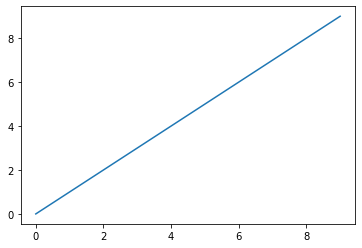

In [4]:
# plot 0 - 9

plt.plot(range(10));

<a id='basic_plot'></a>
### Basic Plot Framework

A basic Matplotlib plot contains a Figure, Axes, a Title, and Labels.


![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

It is also possible to include <b>multiple axes</b> in one figure. This image shows three axes.

![](https://files.realpython.com/media/empty_gridspec_annot.782349dc90a1.png)

<a id='plot_style'></a>
### Plotting with Style

Using different plotting character <b>keys</b> in the `plot` function's second argument, you can plot different styles of <b>lines</b> and <b>symbols</b> using different <b>colors</b>.

In the following plot, '`+`' indicates the symbols should be shaped like crosses, '`r`' tells Matplotlib to plot the line in red, and '`--`' says the line should be dashed.

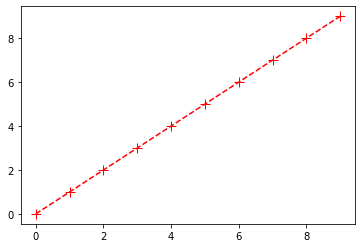

In [5]:
plt.plot(range(10), '+r--', markersize=10, label='inc');

Here are a few more examples:

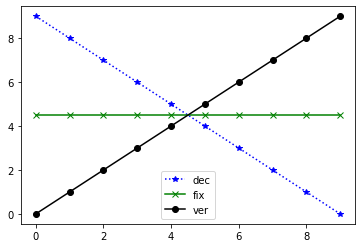

In [6]:
plt.plot(range(10)[::-1], 'b*:', label='dec')
plt.plot([4.5]*10, 'gx-', label='fix')
plt.plot(range(10), 'ko-', label='ver')
plt.legend();

<a id='plot_shapes'></a>
### Plotting Shapes

You can also draw shapes on a plot using patches.

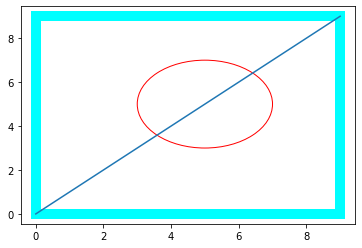

In [7]:
plt.plot(range(10))
plt.gca().add_patch(patches.Circle((5, 5), 2, edgecolor='red', facecolor='none'))
plt.gca().add_patch(patches.Rectangle((0, 0), 9, 9, linewidth=10, edgecolor='cyan', facecolor='none'));

>A good reference for Matplotlib plotting can be found [here](https://www.stat.berkeley.edu/~nelle/teaching/2017-visualization/README.html#quick-references).

<a id='plot_numpy'></a>
### Plotting with Numpy

<b>Numpy</b> is a Python library that has some useful functions for dealing with number sequences. Below is an example of plotting functions using Matplotlib from a Numpy array.

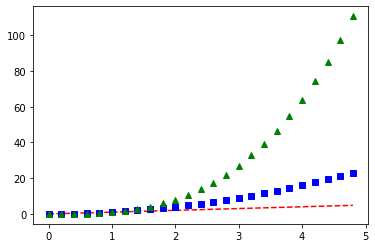

In [8]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^');

Here is an example using random number generation features.

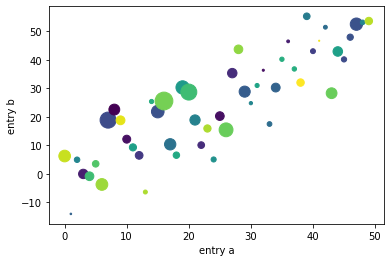

In [9]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b');

<a id='plot_control'></a>
### More Plotting Control 

Knowing the <b>Elements of a Plot</b> can allow you to adjust the plot layout with more fine control. Here are important parts of a plot!

![](https://matplotlib.org/_images/anatomy.png)

Using these we can <b>fine tune</b> labels and line widths for the following histogram.

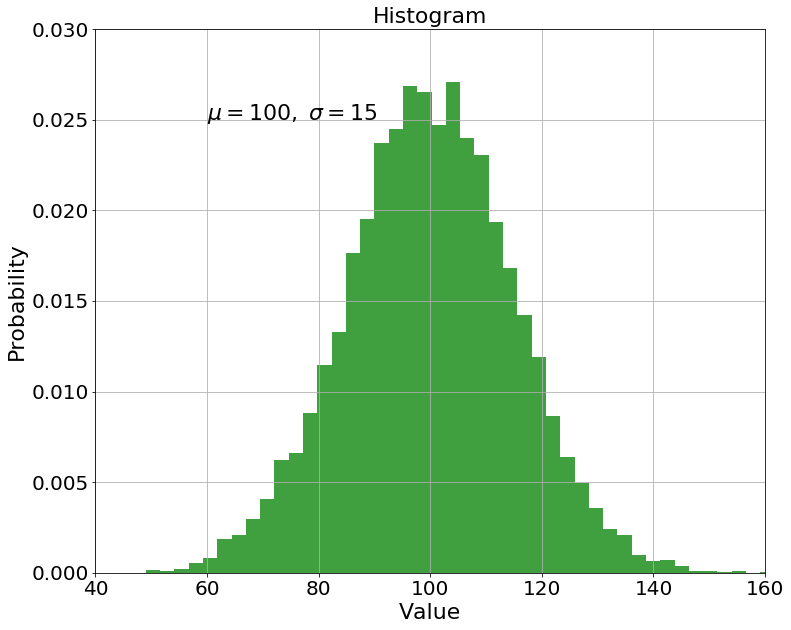

In [10]:
plt.figure(figsize=(12,10))

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

n, bins, _ = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)
plt.xlabel('Value', fontsize=22)
plt.ylabel('Probability', fontsize=22)
plt.title('Histogram', fontsize=22)
plt.tick_params(labelsize=20)
plt.text(60, .025, r'$\mu=100,\ \sigma=15$', fontsize=22)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

<a id='intro_basemap'></a>
## Introducing Basemap

<b>Basemap</b> is a library for plotting maps in Python. It handles dealing with coordinate projections, plots user-specified data using Matplotlib, and gathers and clips datasets to draw in the background.

Once you set up a Basemap, you can call different <b>functions</b>, such as the `drawcoastlines` function to add layers to the map.

The cell below initiates a Basemap by designating projection, resolution, window extent and coordinates.

In [11]:
# set initial values

bmap = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

Nothing is plotted yet. We can see the type of `bmap` below.

In [12]:
bmap

Now we can start adding to the map:

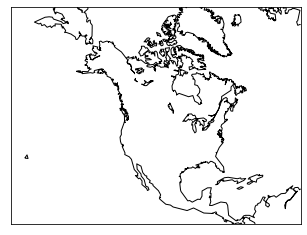

In [13]:
# draw coastlines

bmap.drawcoastlines();

By adding a blue background, we can simulate oceans.

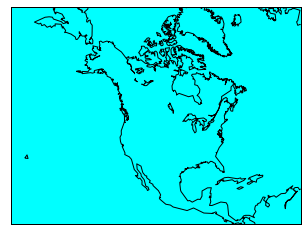

In [14]:
# set up map

bmap = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
bmap.drawcoastlines()

# set map background to blue

bmap.drawmapboundary(fill_color='aqua');

Finally we can color the continents so that it looks like they are on top of the ocean.

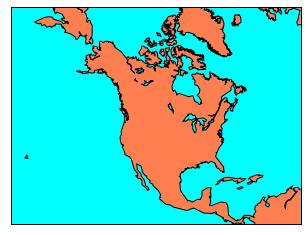

In [15]:
# set up map

bmap = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
bmap.drawcoastlines()
bmap.drawmapboundary(fill_color='aqua')

# fill continents, set lake color same as ocean color.

bmap.fillcontinents(color='coral',lake_color='aqua');

<a id='basemap_back'></a>
### Basemap Backgrounds

Several types of preloaded map <b>style options</b> are available in Basemap. Here are a few examples:

<b>Blue Marble</b>:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


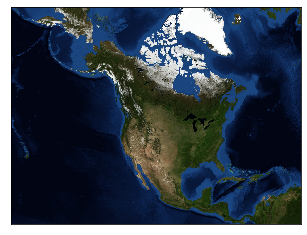

In [16]:
bmap = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
bmap.bluemarble();

<b>Shaded Relief</b>:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


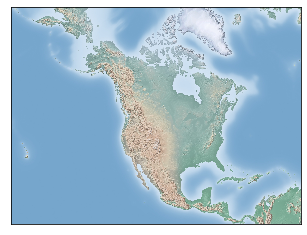

In [17]:
bmap = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
bmap.shadedrelief();

<b>ETOPO1 Global Relief Model</b>: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


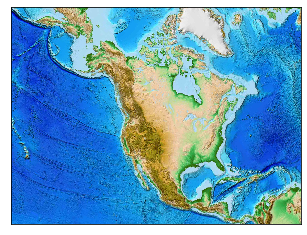

In [18]:
bmap = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
bmap.etopo();

<a id='basemap_prj'></a>
### Projecting with Basemap

<b>Basemap</b> handles different projections with the projection parameter in the basic basemap. It is fairly easy to draw parallels and meridians with Basemap.

This first map has a Lambert Conformal projection, indicated by `lcc`.

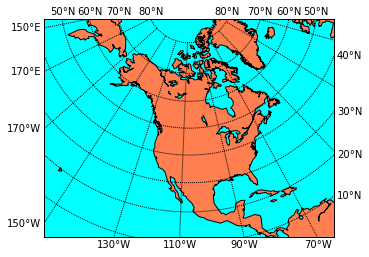

In [19]:
# setup Lambert Conformal basemap

m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')

# draw parallels and meridians

parallels = np.arange(0.,81,10.)
m.drawparallels(parallels,labels=[False,True,True,False])

meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True]);

This next map has a Miller projection, indicated by `mill`. This also shows how you can incorporate shading to indicate daylight throughout the map.

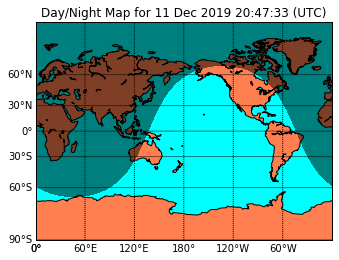

In [20]:
# create a map with the Miller projection

m = Basemap(projection='mill',lon_0=180)

# plot coastlines, draw label meridians and parallels.
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax+30,60),labels=[0,0,0,1])

# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')

# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS = m.nightshade(date)

plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"));

<a id='basemap_plot'></a>
### Plotting over Basemap

The real power of <b>Basemap</b> comes from plotting your data over it!

Here, random integers are plotted and connected on top of a Basemap.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


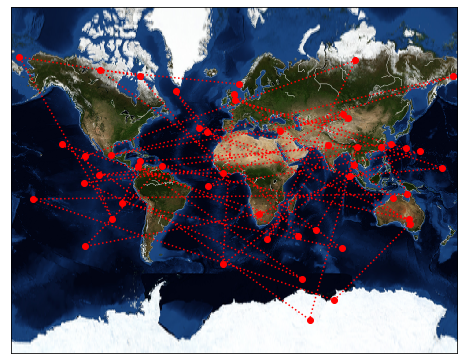

In [21]:
lats = np.random.randint(-75, 75, size=50)
lons = np.random.randint(-179, 179, size=50)

fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

x, y = m(lons, lats)  # transform coordinates

plt.plot(x,y,'ro:');

On this next map, a <b>great circle route</b> is calculated and visualized.

(0.0, 12538680.3401438) (0.0, 5750776.406212599)


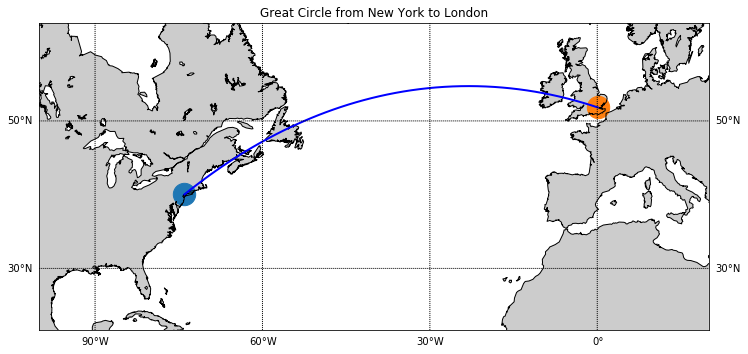

In [22]:
fig=plt.figure(figsize=(12,6))

# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
m.drawcoastlines()
m.fillcontinents(zorder=0)


# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98

# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08

# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')

m.scatter(nylon, nylat, s=500, latlon=True)
m.scatter(lonlon, lonlat, s=500, latlon=True)

# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])

# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

plt.title('Great Circle from New York to London')
print (plt.xlim(), plt.ylim())

<a id='geopandas'></a>
## GeoPandas, Brielfy

<b>GeoPandas</b> is a Python library used for working with Geospatial data. We'll only look at it briefly here to see how it works with Basemap.
>Learn more about <b>GeoPandas</b> in [this notebook](Python_Geospatial_Libraries_p3.ipynb)!

Plot a simple series of points:

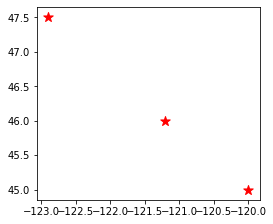

In [23]:
# plot a geoseries

gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs.crs = {'init': 'epsg:4326'}
gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4));

<a id='gpd_base'></a>
### Combining GeoPandas and Basemap

This is an example of a map that combines <b>GeoPandas</b> and <b>Basemap</b>.

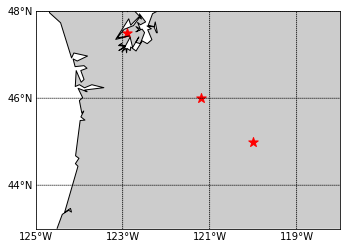

In [24]:
# plot geoseries over basemap

m = Basemap(llcrnrlon=-125.,llcrnrlat=43.,urcrnrlon=-118.,urcrnrlat=48.,\
            resolution='l',epsg=4326)
m.drawparallels(np.arange(42,50,2),labels=[1,0,0,1])
m.drawmeridians(np.arange(-125,-115,2),labels=[1,0,0,1])
m.drawcoastlines()
m.fillcontinents(zorder=0)
gs.plot(ax=plt.gca(), marker='*',color='red', markersize=100);

<a id='mass_example'></a>
## ProblemExample: The Massachusetts Dataset

Here lets look at taking a dataset and displaying it with Python. 

First we'll import the data from a shapefile:

In [27]:
# read data from shapefile

mass_shp = gpd.read_file(os.path.join('./pyintro_resources/data','towns.shp'))
type(mass_shp)

geopandas.geodataframe.GeoDataFrame

Now lets inspect the file:

In [28]:
# read first lines

mass_shp.head()

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
0,195,MOUNT WASHINGTON,25003,080,43300,100,135,130,35,-5,1,T,167,37,5.797118e+07,31638.316048,"POLYGON ((36115.894 880179.251, 36980.214 8796..."
1,325,WEST SPRINGFIELD,25013,110,76030,26965,27537,27899,572,362,2,TC,28391,492,4.531454e+07,34458.401293,"POLYGON ((106810.684 879681.441, 106814.824 87..."
2,122,HANOVER,25023,040,28285,11403,11912,13164,509,1252,1,T,13879,715,4.059553e+07,29602.365447,"POLYGON ((250886.704 878325.941, 251695.934 87..."
3,18,AVON,25021,005,02935,4843,4558,4443,-285,-115,4,T,4356,-87,1.174804e+07,14941.830951,"POLYGON ((238434.144 876232.691, 239075.264 87..."
4,112,GRANVILLE,25013,035,26675,1298,1403,1521,105,118,4,T,1566,45,1.115403e+08,43612.600436,"POLYGON ((77501.874 877293.751, 83945.044 8759..."


We can fairly easily plot the data using the `GeoDataFrame.plot` method!

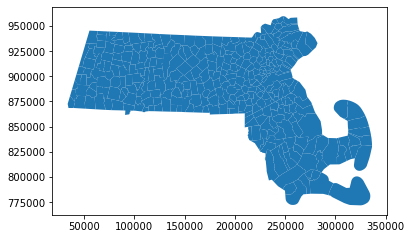

In [29]:
mass_shp.plot();

We can then expand on the basic plot:

(18737.43371539488, 351461.7047153942) (762383.0043559993, 969145.7473560023)


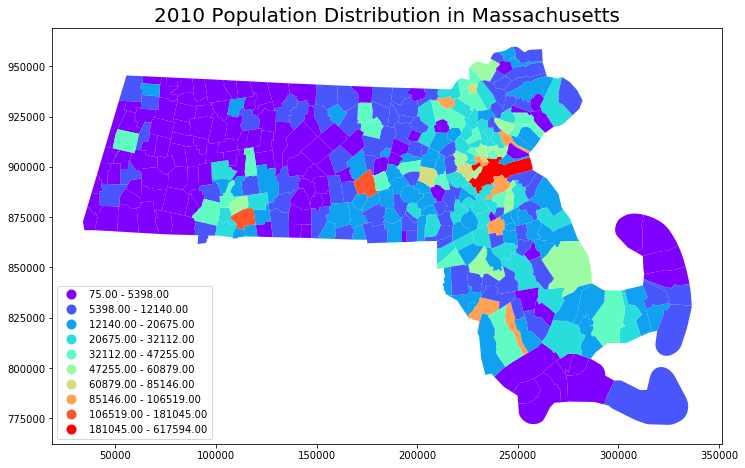

In [30]:
##mass_shp.plot(column='POP2010', cmap='rainbow', legend=True, scheme='Fisher_Jenks', k=10, figsize=(12,8),legend_kwds={'loc':'lower left'})
## question for the two parameters: scheme and legend_kwds
import mapclassify
mass_shp.plot(column='POP2010',cmap='rainbow',legend=True,k=10,figsize=(12,8),scheme='Fisher_Jenks',legend_kwds={'loc':'lower left'})
plt.title('2010 Population Distribution in Massachusetts', fontsize=20)
print (plt.xlim(), plt.ylim())

It can be useful to know the coordinate reference system for our data:

In [31]:
mass_shp.crs

{'init': 'epsg:26986'}

Now we can plot our data using Basemap (Note that this is low quality, but higher quality Basemap datasets can be installed).

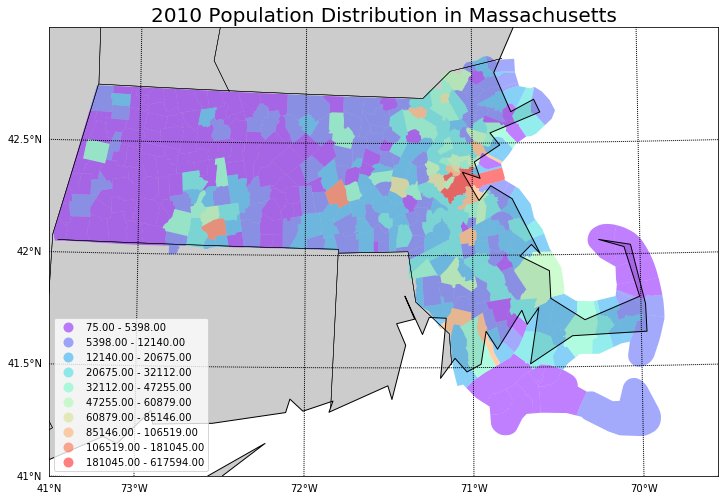

In [32]:
plt.figure(figsize=(12,10))
m = Basemap(llcrnrlon=-73.5,llcrnrlat=41.0,urcrnrlon=-69.5,urcrnrlat=43., 
            resolution = 'l', epsg=26986)
m.drawparallels(np.arange(41, 43, 0.5),labels=[1,0,0,1])
m.drawmeridians(np.arange(-73, -69, 1.),labels=[1,0,0,1])
m.drawcoastlines()
m.drawstates()
m.fillcontinents(zorder=0)

mass_shp.to_crs(m.proj4string).plot(column='POP2010', cmap='rainbow', legend=True, 
                                    scheme='Fisher_Jenks', k=10, figsize=(12,8), 
                                    legend_kwds={'loc':'lower left'}, alpha=0.5, 
                                    ax=plt.gca())

plt.title('2010 Population Distribution in Massachusetts', fontsize=20);

<a id='web_map'></a>
## Problem: Moving to the Web

Sometimes it can be useful to have an interactive web map that allows you to zoom in and out, toggle layers, and otherwise interact with the data. Two particular libraries, <b>mplleaflet</b> and <b>folium</b> come in handy here!

<b>mplleaflet</b> easily converts Matplotlib blots to Leaflet webmaps.
<b>folium</b> is used to display data in Leaflet webmaps.

>Learn more about mplleaflet https://github.com/jwass/mplleaflet
<br>Introduction to Leaflet https://leafletjs.com/
<br>folium documentation https://python-visualization.github.io/folium/

<a id='mplleaflet'></a>
### Plotting with mplleaflet

To demonstrate how easily <b>mplleaflet</b> works, here is a simple plot using Matplotlib.

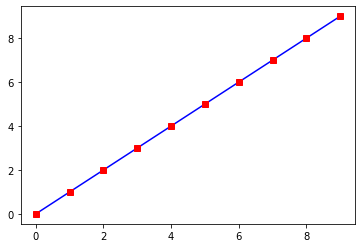

In [33]:
# basic plot

plt.plot(range(10), 'b') 
plt.plot(range(10), 'rs');

With one extra line in <b>mplleaflet</b>, we can convert this to an interactive Leaflet map!

In [34]:
# basic plot - now interactive

plt.plot(range(10), 'b') 
plt.plot(range(10), 'rs')
mplleaflet.display()

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Now, lets make an interactive map using the Chicago Community dataset.

In [36]:
# read in data

df = gpd.read_file(os.path.join('./pyintro_resources/data', 'Chicago_Community.geojson'))

In [37]:
# display columns

df.columns

Index(['community', 'area', 'shape_area', 'perimeter', 'area_num_1',
       'area_numbe', 'comarea_id', 'comarea', 'shape_len', 'geometry'],
      dtype='object')

What does a regular plot look like?

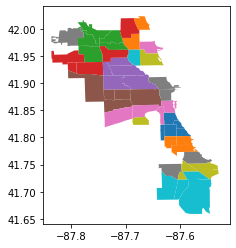

In [38]:
# plot the first 50 communities

ax = df.head(50).plot(cmap='tab10')

In [39]:
# plot interactively

mplleaflet.display(fig=ax.figure, crs=df.crs)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Here is another example:

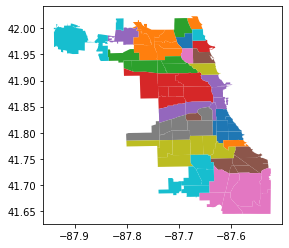

In [40]:
ax=df.plot(cmap='tab10')

This saves the map to an HTML File.

In [41]:
mplleaflet.show(fig=ax.figure, crs=df.crs, tiles='cartodb_positron', path='chicago.html')

Now we can load the HTML file into an iframe for display.

In [42]:
%%html
<iframe src='chicago.html' width=1000 height=600/>

<a id='folium'></a>
### Plotting with folium

<b>folium</b> can create some truly stunning interactive webmaps.

Here is a basic example:

In [43]:
# map centered on a specific location

m = folium.Map(location=[40.1080246,-88.2259164],zoom_start=17)
m

You can easily save a map to an HTML file using the `save` function.

In [44]:
# save the map as HTML

m.save('folium-quad.html')

You can quickly change the base map style:

In [45]:
folium.Map(location=[40.1080246,-88.2259164], tiles='Stamen Toner', zoom_start=17)

You can easily add markers with popups descriptions tooltip windows. The `add_to` function allows you to add additional content to a base map.

In [46]:
# hover over markers to see tooltip

m = folium.Map(location=[40.1094763,-88.2261033], zoom_start=17, tiles='Stamen Terrain')

tooltip = 'Click me!'
folium.Marker([40.1094763,-88.2261033], popup='<i>Natural History Building</i>', tooltip=tooltip).add_to(m)
folium.Marker([40.1094375,-88.2271792], popup='<b>Illini Union</b>', tooltip=tooltip).add_to(m)
m

Folium also makes it easy to change marker styles.

In [47]:
# change marker style

m = folium.Map(location=[40.1094763,-88.2261033], zoom_start=17, tiles='Stamen Terrain')
folium.Marker(location = [40.1094763,-88.2261033], popup = 'Natural History Building', 
              icon = folium.Icon(icon = 'cloud')).add_to(m)
folium.Marker(location = [40.1094375,-88.2271792], popup='Illini Union',
    icon = folium.Icon(color = 'green')).add_to(m)
folium.Marker(location=[40.1092067,-88.2266318], popup='Harker Hall',
    icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
m

It is simple to add shapes to a map as well.

In [48]:
# plot circles

m = folium.Map(location=[40.1094763,-88.2261033], tiles='Stamen Toner', zoom_start=13)

folium.Circle(radius=100, #meters
    location=[40.107578, -88.227182], popup='The Quad', color='crimson',fill=False,).add_to(m)
folium.CircleMarker(location=[40.117955, -88.242498],
    radius=30, #screen pixels, remains constant when zoomed out
    popup='Downtown Champaign', color='#3186cc', fill=True, fill_color='#3186cc'
).add_to(m)
m

Other types of interactive features can be added, such as location aware pop ups. <b>Click the map</b> to see the latitude and longitude values!

In [49]:
# add lat/long popup on click

m = folium.Map(location=[40.1094763,-88.2261033], tiles='Stamen Terrain', zoom_start=12)
m.add_child(folium.LatLngPopup())
m

Similarly, you can also interactively add things like markers.

In [50]:
# Add markers on click
 
m = folium.Map(location=[46.8527, -121.7649], tiles='Stamen Terrain', zoom_start=13)
folium.Marker([46.8354, -121.7325], popup='Camp Muir').add_to(m)
m.add_child(folium.ClickForMarker(popup='Waypoint'))
m

### How do you want to plot your maps?